# **Machine Learning Lab Task: Clustering analysis and Association Rule Mining**

**Objective:** The objective of this lab is **to apply PCA on each dataset before K-Means Clustering, Hierarchical Clustering, and DBSCAN for each dataset**.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**PCA for Feature Reduction**

   *  Apply Principal Component Analysis to reduce features while maintaining variance.

   * Plot explained variance ratio to decide how many components to retain.

   * Select top N components covering ~90–95% variance.

   * Use these reduced features for clustering.

* Visualize your analysis before and after clustering


**Task1- K-Means Clustering**

**Concept:**


*  K-Means is a centroid-based clustering algorithm that partitions data into K clusters.
*  It iteratively assigns each data point to the nearest centroid and updates centroids until convergence.
*  The number of clusters K needs to be specified in advance.

**Steps:**



1.   Normalize the dataset (since K-Means is distance-based).
2.   Use the Elbow Method to determine the optimal number of clusters (K).
3.   Apply K-Means clustering and interpret the clusters.
* Visualize your analysis before and after clustering
4.   Visualize and analyze cluster characteristics.

**Dataset Link for K-Means Clustering**
[Mall Customer Segmentation Data](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python)





In [ ]:
df_mall = pd.read_csv("Mall_Customers.csv")
df_mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Perform data Preprocessing

In [ ]:
df_mall.rename(columns={'Annual Income (k$)':'Annual_Income', 'Spending Score (1-100)':'Spending_Score'}, inplace=True)
df_mall.columns=df_mall.columns.str.strip()

In [ ]:
df_mall.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#remove Id column
df_mall.drop(['CustomerID'], axis=1, inplace=True)

We are left with four features

In [ ]:
df_mall.shape

(200, 4)

In [ ]:
#checking the datatypes of features
df_mall.dtypes

,0
Gender,object
Age,int64
Annual_Income,int64
Spending_Score,int64


All data types are as per the definitions

**Missing values**

In [ ]:
#checking for missing values
df_mall.isnull().sum()

,0
Gender,0
Age,0
Annual_Income,0
Spending_Score,0


No missing values

**Visualizing the data**

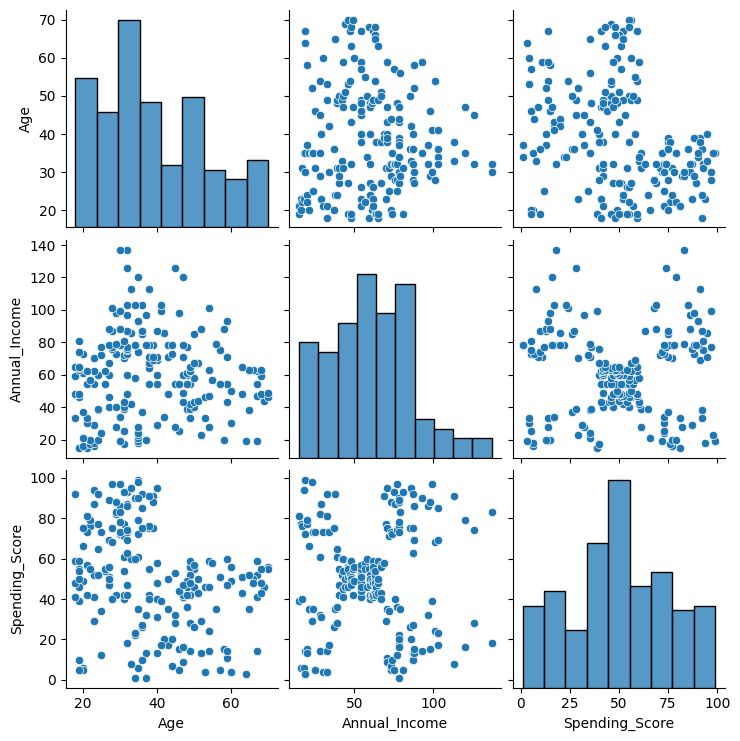

In [ ]:
#draw pairplots for the numerical data
sns.pairplot(df_mall)

<Axes: >

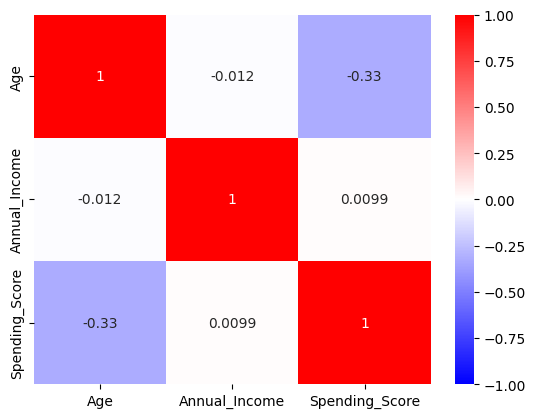

In [ ]:
#build the correllation matrix
corr_mat=df_mall.select_dtypes(include = 'number').corr()
#heatmap with blue and red colours
sns.heatmap(corr_mat, annot=True, cmap='bwr',vmin=-1,vmax=1)

Hence not much correlation among the features

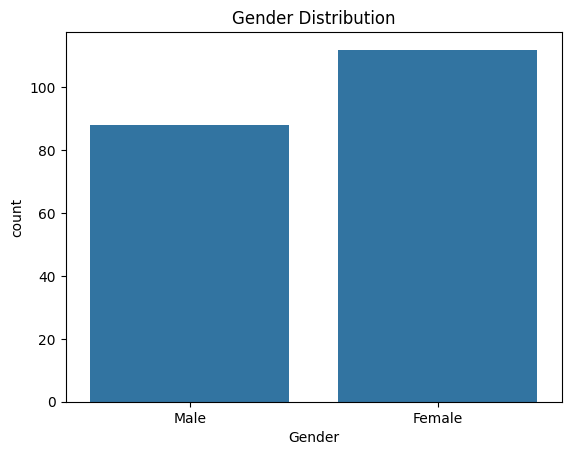

In [ ]:
sns.countplot(x='Gender', data=df_mall)
plt.title("Gender Distribution")
plt.show()

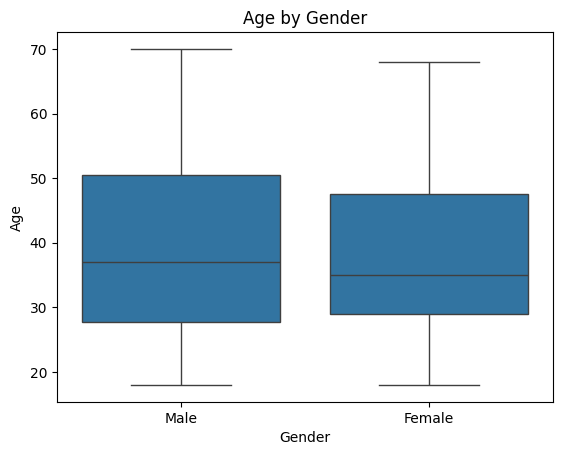

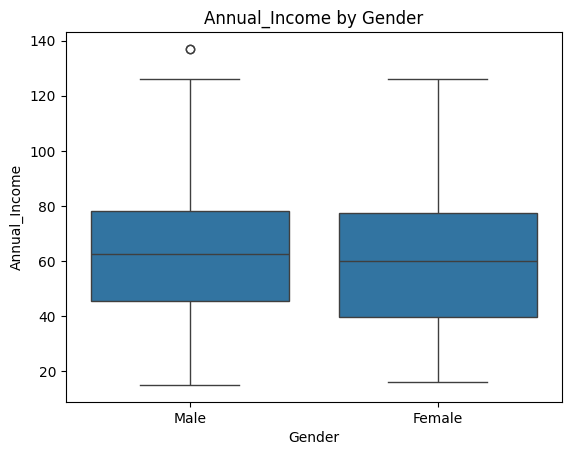

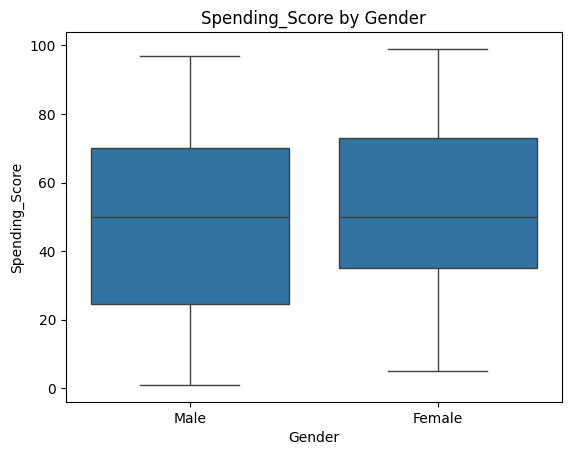

In [ ]:
for col in df_mall.select_dtypes(include='number').columns:
    sns.boxplot(x='Gender', y=col, data=df_mall)
    plt.title(f"{col} by Gender")
    plt.show()


**Remove outliers**

In [ ]:
numeric_cols = df_mall.select_dtypes(include=['number']).columns
for col in numeric_cols:
    Q1 = df_mall[col].quantile(0.25)
    Q3 = df_mall[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_mall = df_mall[(df_mall[col] >= lower_bound) & (df_mall[col] <= upper_bound)]


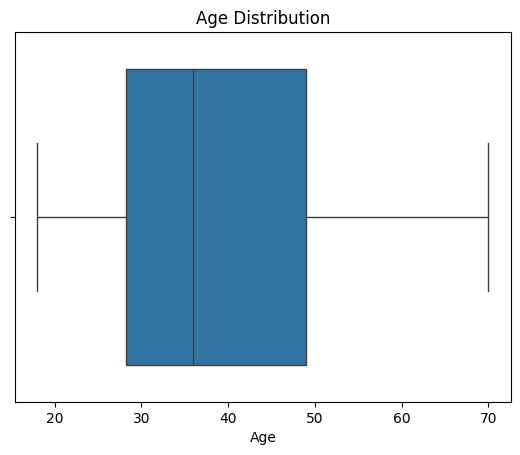

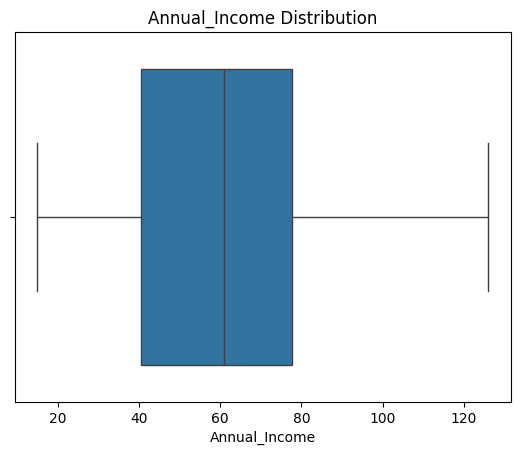

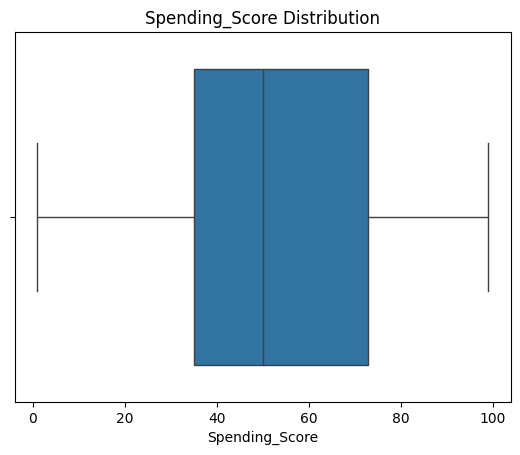

In [ ]:
#draw the boxplots of each numerical variable
for col in df_mall.select_dtypes(include='number').columns:
    sns.boxplot(x=col, data=df_mall)
    plt.title(f"{col} Distribution")
    plt.show()

In [ ]:
df_mall.shape

(198, 4)

So 2 samples were removed as outliers

**Dummy encoding**

In [ ]:
#dummy encode the Gender column
df_mall=pd.get_dummies(df_mall, columns=['Gender'], drop_first=True)
df_mall.head()

,Age,Annual_Income,Spending_Score,Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


**PCA**

In [ ]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_mall_scaled=scaler.fit_transform(df_mall)

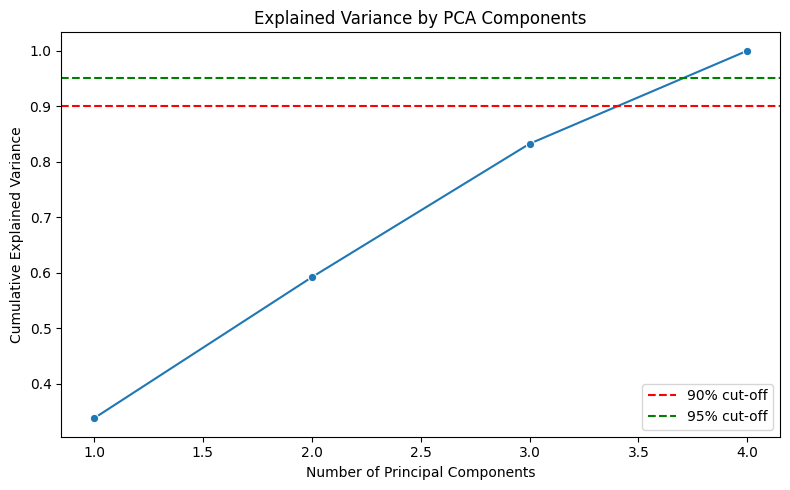

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
mall_pca_trial = pca.fit_transform(df_mall_scaled)

# Plot explained variance ratio
plt.figure(figsize=(8, 5))
sns.lineplot(x=range(1, len(pca.explained_variance_ratio_)+1),
             y=pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% cut-off')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% cut-off')
plt.legend()
plt.tight_layout()
plt.show()


To get > 90% variance ratio explained, we need all the features for clustering

**K-Means Clustering**

Using the first 3 principal components to get the visualisation of the data

In [ ]:
pca_3=PCA(n_components=3)
df_mall_3 = pca_3.fit_transform(df_mall_scaled)

import plotly.express as px

# Convert PCA output to a DataFrame for better labeling
pca_df = pd.DataFrame(df_mall_3, columns=['PC1', 'PC2', 'PC3'])

# Create interactive 3D scatter plot
fig = px.scatter_3d(
    pca_df,
    x='PC1',
    y='PC2',
    z='PC3',
    title='Interactive 3D PCA Plot',
    opacity=0.7
)

fig.update_traces(marker=dict(size=5))
fig.show()



Text(0, 0.5, 'Principal Component 2')

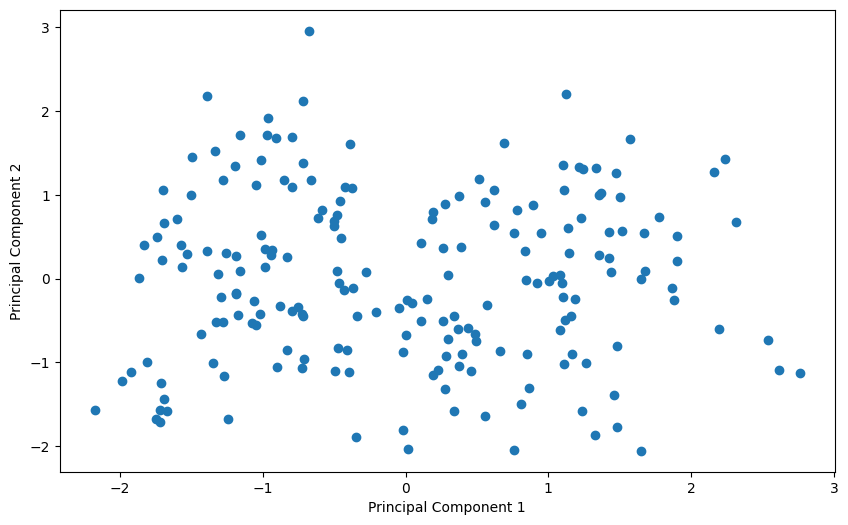

In [ ]:
#taking 2 Principal components
pca_2=PCA(n_components=2)
df_mall_2 = pca_2.fit_transform(df_mall_scaled)
#plot the scatter plot for the 2 dimension
plt.figure(figsize=(10,6))
plt.scatter(df_mall_2[:,0], df_mall_2[:,1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Initialize centroids for 3D
def init_centroids(k, X):
    arr = []
    for i in range(k):
        cx1 = np.random.uniform(min(X[:, 0]), max(X[:, 0]))
        cx2 = np.random.uniform(min(X[:, 1]), max(X[:, 1]))
        cx3 = np.random.uniform(min(X[:, 2]), max(X[:, 2]))
        arr.append([cx1, cx2, cx3])
    return np.asarray(arr)

# Euclidean distance
def dist(a, b):
    return np.sqrt(np.sum(np.square(a - b)))

# Assign points to closest centroid
def assign_cluster(k, X, cg):
    cluster = [-1] * len(X)
    for i in range(len(X)):
        if len(cg) == 0:
            raise ValueError("Centroid list is empty.")
        dist_arr = [dist(X[i], cg[j]) for j in range(len(cg))]
        if not dist_arr:
            raise ValueError("No distances computed for this sample.")
        cluster[i] = np.argmin(dist_arr)
    return np.asarray(cluster)


# Compute new centroids
def compute_centroids(k, X, cluster):
    cg_arr = []
    for i in range(k):
        points = [X[j] for j in range(len(X)) if cluster[j] == i]
        if points:  # only compute mean if not empty
            cg_arr.append(np.mean(points, axis=0))
        else:
            # reinitialize centroid randomly if no points assigned
            rand_idx = np.random.randint(len(X))
            cg_arr.append(X[rand_idx])  # fallback to random point
    return np.asarray(cg_arr)


# Change between old and new centroids
def measure_change(cg_prev, cg_new):
    return sum(dist(a, b) for a, b in zip(cg_prev, cg_new))

# 3D Visualization
def show_clusters(X, cluster, cg):
    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib.cm as cm

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    df = pd.DataFrame(dict(x=X[:, 0], y=X[:, 1], z=X[:, 2], label=cluster))
    unique_labels = np.unique(cluster)
    n_clusters = len(unique_labels)

    # Dynamically get colors from a colormap
    colormap = cm.get_cmap('tab20', n_clusters)
    colors = [colormap(i) for i in range(n_clusters)]

    for idx, key in enumerate(unique_labels):
        group = df[df['label'] == key]
        ax.scatter(
            group['x'], group['y'], group['z'],
            label=f'Cluster {key}',
            color=colors[idx],
            s=50, alpha=0.6
        )

    # Plot centroids
    ax.scatter(
        cg[:, 0], cg[:, 1], cg[:, 2],
        c='black', marker='*', s=200, label='Centroids'
    )

    ax.set_xlabel('X_1')
    ax.set_ylabel('X_2')
    ax.set_zlabel('X_3')
    ax.set_title('3D Cluster Visualization')
    ax.legend()
    plt.tight_layout()
    plt.show()

def k_means(k, X):
    cg_prev = init_centroids(k, X)
    cluster = [0] * len(X)
    cg_change = 100
    total_change = 0

    while cg_change > 0.001:
        cluster = assign_cluster(k, X, cg_prev)
        cg_new = compute_centroids(k, X, cluster)
        cg_change = measure_change(cg_new, cg_prev)
        total_change += cg_change
        cg_prev = cg_new

    print(compute_wcss(X,cluster,cg_prev))
    show_clusters(X, cluster, cg_prev)
    return cluster

def compute_wcss(X, clusters, centroids):
    wcss = 0
    for i in range(len(X)):
        centroid = centroids[clusters[i]]
        wcss += np.sum((X[i] - centroid) ** 2)
    return wcss


def elbow_method(X, max_k=10, max_iter=100, tolerance=1e-3):
    wcss_values = []

    for k in range(1, max_k + 1):
        success = False

        for attempt in range(10):  # Try up to 10 times for each k
            cg_prev = init_centroids(k, X)
            cg_change = float('inf')

            for _ in range(max_iter):
                clusters = assign_cluster(k, X, cg_prev)
                cg_new = compute_centroids(k, X, clusters)

                if np.isnan(cg_new).any():
                    print(f"Empty cluster at k={k}, restarting (attempt {attempt+1})...")
                    break  # break out of the inner iteration loop to retry

                cg_change = measure_change(cg_prev, cg_new)
                if cg_change <= tolerance:
                    success = True
                    break
                cg_prev = cg_new

            if success:
                break

        if not success:
            raise RuntimeError(f"K-means failed to converge at k={k} after multiple attempts.")

        wcss = compute_wcss(X, clusters, cg_prev)
        wcss_values.append(wcss)

    # Plot the elbow curve
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_k + 1), wcss_values, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('WCSS')
    plt.xticks(range(1, max_k + 1))
    plt.grid(True)
    plt.show()


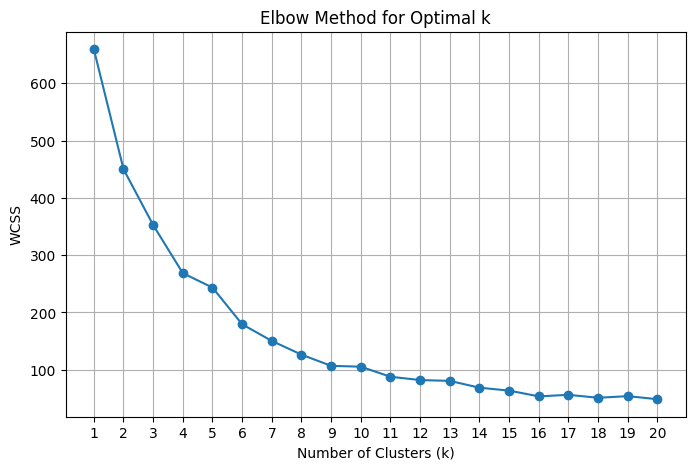

In [ ]:
elbow_method(df_mall_3, max_k=20)  # Try k values from 1 to 20


No clear elbow is shown here, but using k = 9

106.64829887374319


<ipython-input-47-c2da6bbab12e>:61: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



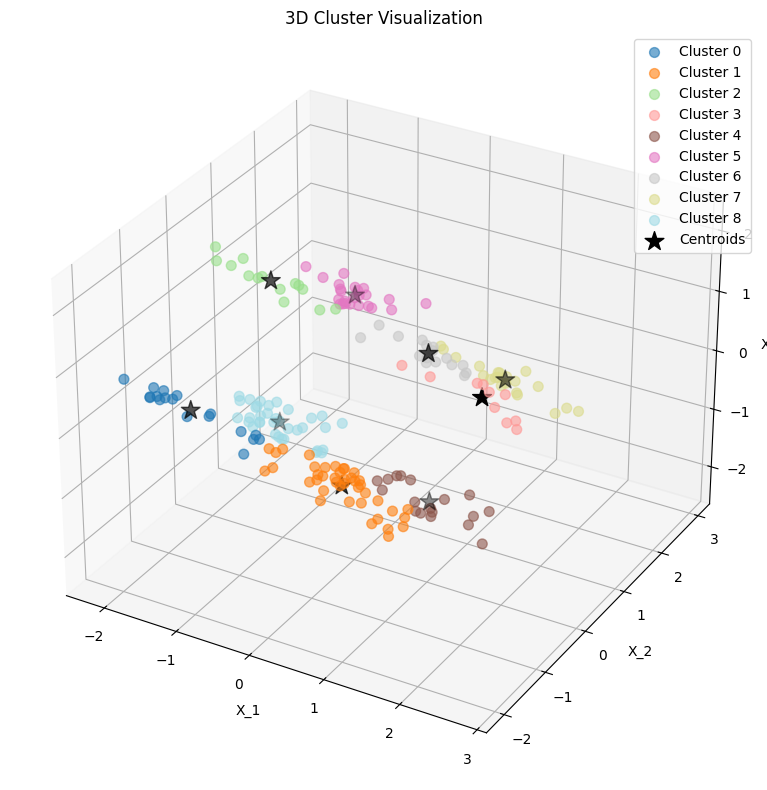

array([2, 2, 1, 0, 0, 0, 1, 0, 3, 0, 3, 0, 1, 0, 3, 2, 1, 2, 3, 0, 6, 2,
       1, 2, 1, 2, 1, 2, 1, 0, 3, 0, 3, 2, 1, 0, 1, 0, 1, 0, 1, 2, 6, 0,
       1, 0, 1, 0, 1, 1, 1, 2, 0, 6, 1, 6, 1, 3, 0, 6, 3, 2, 1, 1, 6, 2,
       1, 1, 2, 1, 3, 1, 1, 1, 6, 5, 1, 6, 8, 1, 6, 6, 3, 1, 8, 6, 1, 8,
       8, 1, 1, 5, 6, 1, 1, 5, 1, 8, 6, 5, 8, 1, 7, 5, 6, 8, 4, 6, 7, 7,
       7, 8, 1, 5, 8, 8, 4, 1, 4, 1, 5, 1, 8, 5, 8, 8, 7, 5, 7, 5, 7, 5,
       8, 8, 6, 8, 4, 5, 6, 8, 4, 5, 8, 8, 7, 5, 7, 8, 4, 5, 7, 5, 4, 8,
       4, 8, 7, 8, 7, 8, 4, 8, 7, 8, 7, 8, 7, 8, 4, 5, 7, 5, 7, 5, 4, 8,
       7, 5, 7, 5, 4, 8, 7, 8, 4, 5, 4, 5, 4, 8, 4, 8, 7, 8, 4, 8, 4, 5])

In [ ]:
k_means(9, df_mall_3)

**Task-2. Hierarchical Clustering**

**Concept:**

*   Hierarchical clustering creates a tree-like structure (dendrogram) representing nested clusters.

*   It does not require predefining K.

**Two types:**

* Agglomerative (Bottom-Up): Each data point starts as its own cluster, and clusters are merged iteratively.

* Divisive (Top-Down): Starts with one large cluster, which is split recursively.

**Steps:**

1.  Normalize the dataset.

2.  Compute the distance matrix using Euclidean distance.

3.  Apply Agglomerative Clustering (most common method).

4.  Use the Dendrogram to determine the optimal number of clusters.
* Visualize your analysis before and after clustering

5.  Analyze and interpret cluster characteristics.

For example : Network Feature Extraction:
Construct adjacency matrices from:

1.   Citation relationships
2.   Author-venue affiliations
3. Paper keyword co-occurrence
4. Cluster Interpretation Framework

Provide domain-specific analysis prompts:
"Identify emerging CS subfields through cluster evolution 2010-2025"
"Map cluster hierarchies to ACM Computing Classification System"
"Analyze Nobel laureate collaboration patterns through dendrogram cuts"

**Dataset for Hierarchical Clustering-**
[The DBLP Computer Science Bibliography Dataset](https://www.kaggle.com/datasets/dheerajmpai/dblp2023)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [ ]:
from lxml import etree
import pandas as pd
import html

records = []

# Configure incremental XML parser
context = etree.iterparse('dblp.xml', events=('end',), load_dtd=False, no_network=False, recover=True, encoding='utf-8')

for event, elem in context:
    if elem.tag in {'article', 'inproceedings', 'incollection', 'proceedings', 'book', 'phdthesis', 'mastersthesis'}:
        entry = {
            'type': elem.tag,
            'title': html.unescape(elem.findtext('title') or ''),
            'year': html.unescape(elem.findtext('year') or ''),
            'journal_or_booktitle': html.unescape(elem.findtext('journal') or elem.findtext('booktitle') or ''),
            'authors': '; '.join([
                html.unescape(a.text)
                for a in elem.findall('author')
                if a is not None and a.text
            ])
        }
        if entry['title'] and entry['year']:
            records.append(entry)

        # Clear the element to free memory
        elem.clear()
        while elem.getprevious() is not None:
            del elem.getparent()[0]

# Convert to DataFrame and save to CSV
df = pd.DataFrame(records)
df.to_csv('dblp_output.csv', index=False, encoding='utf-8')


In [ ]:
#use the csv file
df_dblp = pd.read_csv('dblp_output.csv')
df_dblp.head()

,type,title,year,journal_or_booktitle,authors
0,article,Spectre Attacks: Exploiting Speculative Execut...,2018,meltdownattack.com,Paul Kocher; Daniel Genkin; Daniel Gruss; Wern...
1,article,Meltdown,2018,meltdownattack.com,Moritz Lipp; Michael Schwarz 0001; Daniel Grus...
2,book,Computer Science Curricula 2013,2013,NaN,NaN
3,article,An Evaluation of Object-Oriented DBMS Developm...,1994,GTE Laboratories Incorporated,Frank Manola
4,article,DARWIN: On the Incremental Migration of Legacy...,1993,GTE Laboratories Incorporated,Michael L. Brodie; Michael Stonebraker


In [ ]:
df_dblp.shape

(4257421, 5)

In [ ]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
df_dblp.head(50)

,type,title,year,journal_or_booktitle,authors
0,article,Spectre Attacks: Exploiting Speculative Execution.,2018,meltdownattack.com,Paul Kocher; Daniel Genkin; Daniel Gruss; Werner Haas 0004; Mike Hamburg; Moritz Lipp; Stefan Mangard; Thomas Prescher 0002; Michael Schwarz 0001; Yuval Yarom
1,article,Meltdown,2018,meltdownattack.com,Moritz Lipp; Michael Schwarz 0001; Daniel Gruss; Thomas Prescher 0002; Werner Haas 0004; Stefan Mangard; Paul Kocher; Daniel Genkin; Yuval Yarom; Mike Hamburg
2,book,Computer Science Curricula 2013,2013,NaN,NaN
3,article,An Evaluation of Object-Oriented DBMS Developments: 1994 Edition.,1994,GTE Laboratories Incorporated,Frank Manola
4,article,DARWIN: On the Incremental Migration of Legacy Information Systems,1993,GTE Laboratories Incorporated,Michael L. Brodie; Michael Stonebraker
5,article,"Integrating Heterogeneous, Autonomous, Distributed Applications Using the DOM Prototype.",1991,GTE Laboratories Incorporated,Mark F. Hornick; Joe D. Morrison; Farshad Nayeri
6,article,Object Model Capabilities For Distributed Object Management.,1989,GTE Laboratories Incorporated,Frank Manola
7,article,Integrating Object-Oriented Applications and Middleware with Relational Databases.,1995,GTE Laboratories Incorporated,Frank Manola
8,article,Towards a Transaction Management System for DOM.,1991,GTE Laboratories Incorporated,Alejandro P. Buchmann; M. Tamer ; Dimitrios Georgakopoulos
9,article,A 'RISC' Object Model for Object System Interoperation: Concepts and Applications.,1993,GTE Laboratories Incorporated,Frank Manola; Sandra Heiler


In [ ]:
df_dblp.describe(include='object')

,type,title,journal_or_booktitle,authors
count,4257421,4257421,4238546,4208156
unique,7,4118939,10019,3149274
top,article,Editorial.,CoRR,J
freq,3079737,5527,485349,2427


<Axes: title={'center': 'Publications per Year'}, xlabel='year'>

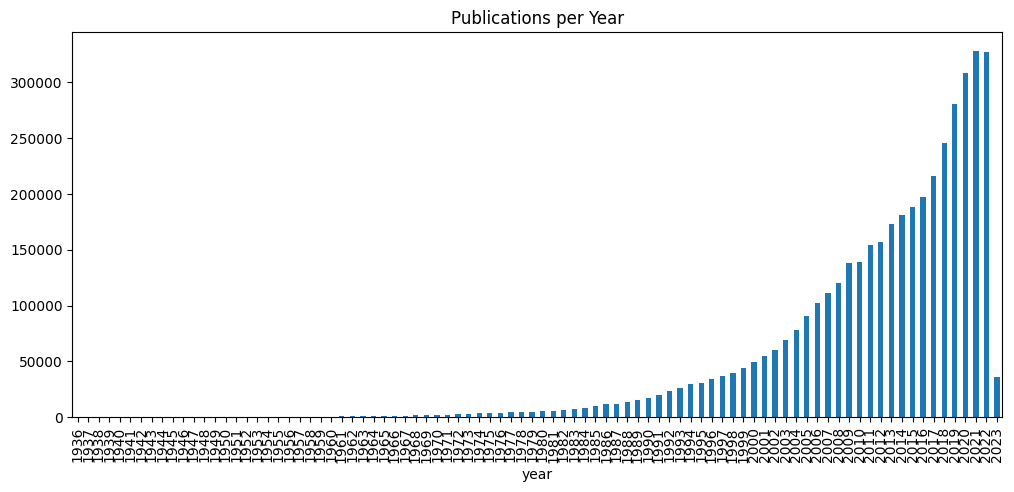

In [ ]:
df_dblp['year'] = pd.to_numeric(df_dblp['year'], errors='coerce')
df_dblp.groupby('year').size().plot(kind='bar', figsize=(12, 5), title='Publications per Year')


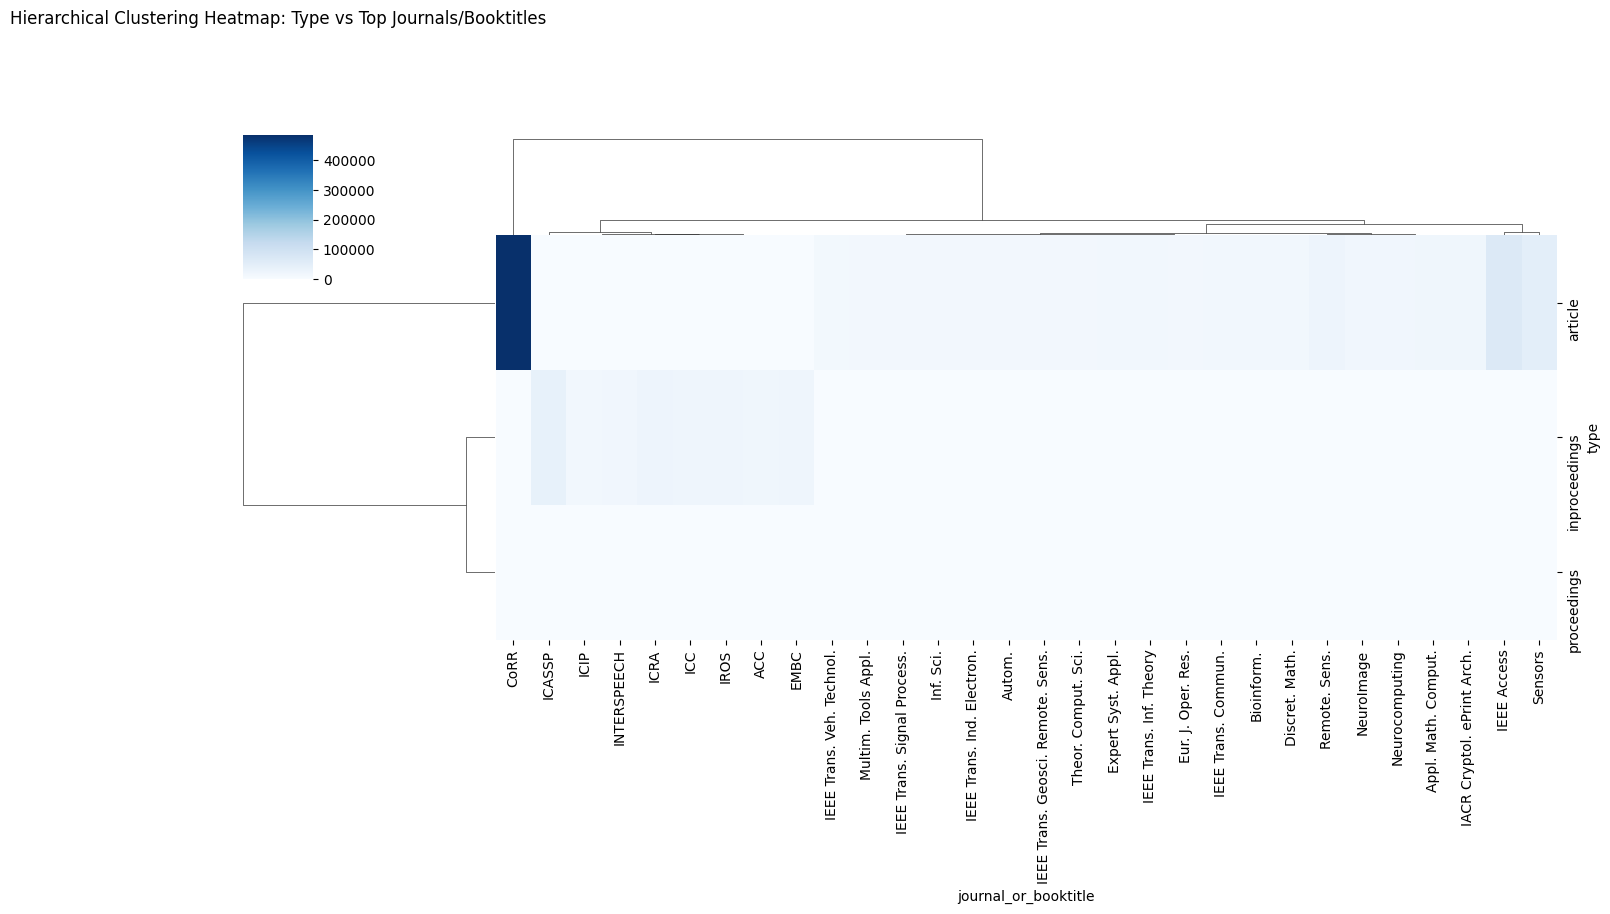

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv('dblp_output.csv')

# Drop missing values for the two columns of interest
df = df.dropna(subset=['type', 'journal_or_booktitle'])

# Keep only top 30 most frequent journal_or_booktitle
top_journals = df['journal_or_booktitle'].value_counts().nlargest(30).index
filtered_df = df[df['journal_or_booktitle'].isin(top_journals)]

# Create a pivot table
pivot_table = pd.pivot_table(filtered_df, index='type', columns='journal_or_booktitle',
                              aggfunc='size', fill_value=0)

# Compute distance matrices and clustering
row_linkage = linkage(pdist(pivot_table, metric='euclidean'), method='ward')
col_linkage = linkage(pdist(pivot_table.T, metric='euclidean'), method='ward')

# Draw the clustermap
sns.clustermap(pivot_table, row_linkage=row_linkage, col_linkage=col_linkage,
               figsize=(14, 8), cmap='Blues')

plt.title('Hierarchical Clustering Heatmap: Type vs Top Journals/Booktitles', pad=80)
plt.show()


We can see the clusters being formed showing number of publications of a specific type and of a specific publication


\\**Task-3. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**

**Concept:**

*  DBSCAN is a density-based clustering algorithm that groups points closely packed together and marks sparse regions as noise.

*  It does not require specifying the number of clusters beforehand.

**Uses two parameters:**

* Epsilon (ε): Defines the neighborhood radius.

* MinPts: Minimum number of points required to form a cluster.

**Steps**


* Determine Epsilon (ε) and MinPts using the k-distance graph.

* Apply DBSCAN clustering.

* Analyze clusters and noise points.
* Visualize your analysis before and after clustering


For example the according to this datasets
Instructions
1. Dataset Preparation
Download the Sentiment140 dataset from Kaggle.
Load the dataset into a Pandas DataFrame and inspect its structure.
Columns: sentiment, id, datetime, query, user, text
Focus on the text column for clustering.
Subsample the dataset (e.g., 10,000 tweets) for computational efficiency.
2. Preprocessing
Clean the tweet text:
Remove stop words, punctuation, and URLs.
Convert text to lowercase.
Extract numerical features using TF-IDF Vectorization:
Limit the number of features (e.g., 1000) to avoid high-dimensional data issues.
Save the feature matrix for further analysis.

3. Pre-Clustering Visualization
Use PCA (Principal Component Analysis) to reduce the feature matrix to 2 dimensions.
Plot the PCA-reduced data as a scatter plot:
Label axes as "Principal Component 1" and "Principal Component 2."
Analyze the distribution of points before clustering.
4. DBSCAN Implementation
Apply DBSCAN clustering to the PCA-reduced data:
Tune parameters: eps (neighborhood radius) and min_samples (minimum points in a cluster).
Use a K-distance graph to estimate an optimal value for eps.
Assign cluster labels to each tweet based on DBSCAN results.
Identify noise points (tweets labeled as -1) and analyze their characteristics.

5. Post-Clustering Visualization
Create a scatter plot of clusters:
Use different colors for each cluster.
Highlight noise points in gray.
Generate word clouds for each cluster:
Extract text from tweets in each cluster.
Visualize frequent terms using WordCloud.
6. Analytical Insights
Answer the following questions based on your analysis:
How many clusters were formed? What percentage of tweets were classified as noise?
What are some common themes or sentiments observed in each cluster?
Provide examples of tweets from each cluster.
Compare the distribution of tweets before and after clustering—what patterns emerged?
7. Advanced Exploration (Optional)
Apply dimensionality reduction using UMAP instead of PCA for better separation of clusters.

Experiment with different distance metrics (e.g., cosine similarity) in DBSCAN.
Use OPTICS clustering as an alternative to DBSCAN for automatic parameter tuning.
Deliverables
Submit the following items:
Python code implementing preprocessing, DBSCAN clustering, and visualization.
Scatter plots showing data distribution before and after clustering.
Word clouds for at least two clusters.
A short report (300–500 words) answering analytical questions about your findings.
**Dataset for DBSCAN-** [Sentiment analysis with tweets](https://www.kaggle.com/datasets/kazanova/sentiment140)

In [35]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from wordcloud import WordCloud
import seaborn as sns
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load dataset
df = pd.read_csv('twitter.csv', encoding='latin-1', header=None)
df.columns = ['sentiment', 'id', 'datetime', 'query', 'user', 'text']
df = df.sample(n=10000, random_state=42).reset_index(drop=True)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@w+|\#', '', text)  # Remove mentions and hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove punctuation and numbers
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['clean_text'] = df['text'].apply(clean_text)

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['clean_text']).toarray()


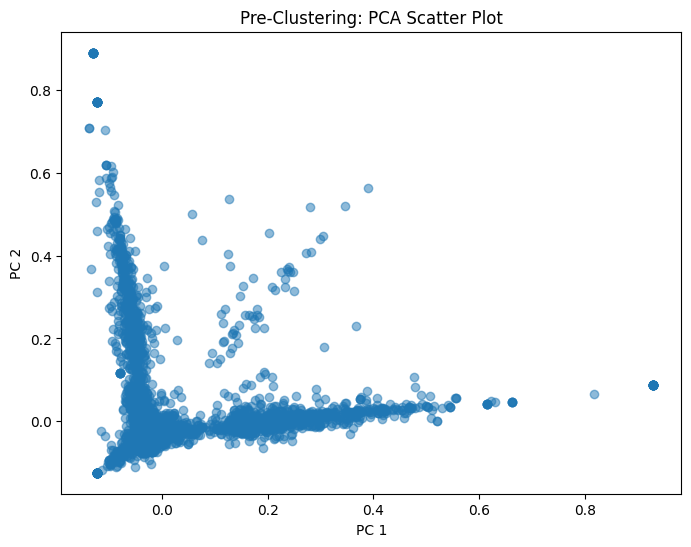

In [37]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title("Pre-Clustering: PCA Scatter Plot")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()


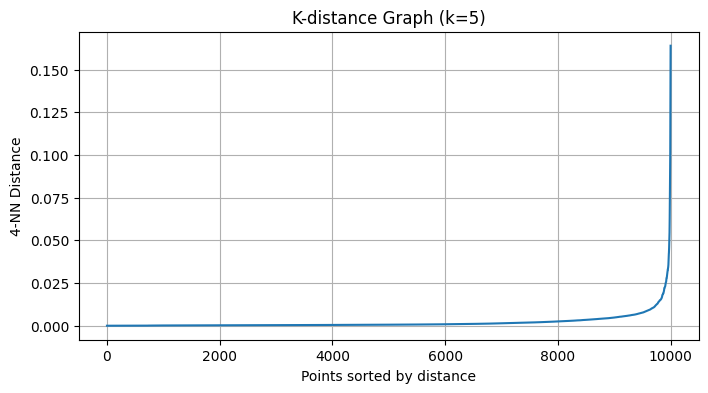

In [38]:
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_pca)
distances, indices = neighbors_fit.kneighbors(X_pca)
distances = np.sort(distances[:, 4])  # 4th index = k-1

plt.figure(figsize=(8, 4))
plt.plot(distances)
plt.title('K-distance Graph (k=5)')
plt.xlabel('Points sorted by distance')
plt.ylabel('4-NN Distance')
plt.grid()
plt.show()


In [42]:
# Use observed ε from K-distance graph (e.g., 1.2), and min_samples (e.g., 5)
dbscan = DBSCAN(eps=0.03, min_samples=5)
labels = dbscan.fit_predict(X_pca)
df['cluster'] = labels


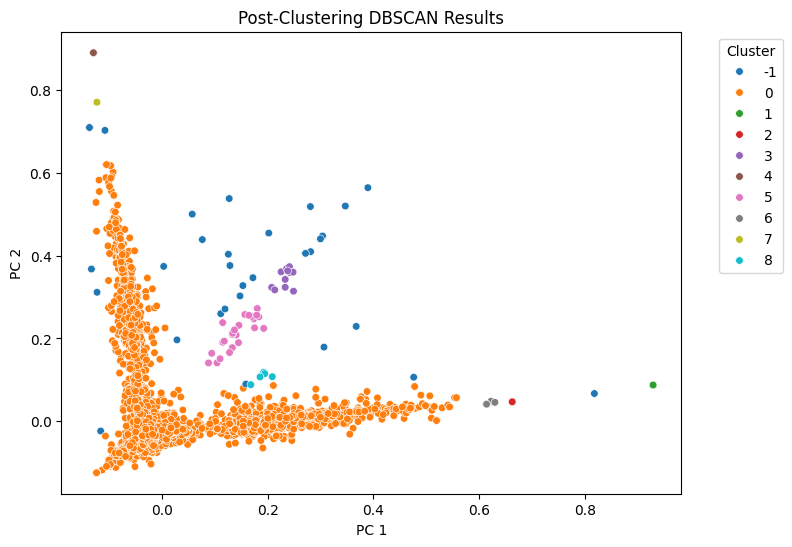

In [43]:
plt.figure(figsize=(8, 6))
palette = sns.color_palette("tab10", len(set(labels)))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette=palette, legend='full', s=30)
plt.title("Post-Clustering DBSCAN Results")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [44]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
noise_pct = (n_noise / len(labels)) * 100

print(f"Clusters formed: {n_clusters}")
print(f"Noise points: {n_noise} ({noise_pct:.2f}%)")

# Example tweets
for cl in range(n_clusters):
    print(f"\nCluster {cl} examples:")
    print(df[df['cluster'] == cl]['text'].sample(3, random_state=1).to_string(index=False))


Clusters formed: 9
Noise points: 31 (0.31%)

Cluster 0 examples:
                      is ready for a great Sunday 
I like to pretend the reason why I didn't use f...
                                Good morning yall 

Cluster 1 examples:
                          im starving now, hix... 
I'm the operator with my pocket calculator ... ...
im gutted bowt the katie n peter situation  xxxxxx

Cluster 2 examples:
                          @sherryjonas i'm going! 
              woooh I'm going to Paris in august! 
@CraigTeich I'm going to automate you deliverin...

Cluster 3 examples:
             @EdwardACullen_ I'm Good yeah thanks 
  I'm missing good seats for paramore for prom!!! 
Just finished Frost Nixon. Pretty good but now ...

Cluster 4 examples:
@fistikal Agreed again....stable, good build qu...
                   @CosgroveMiranda good morningg 
                good eve  http://plurk.com/p/p619u

Cluster 5 examples:
Today is another good day for some less extreme...
have a good ti

**Task4- Association Rule Mining (Market Basket Analysis)**

    Within the confines of this task, we delve into the intricacies of a transactional dataset meticulously curated for association rule mining. This powerful data mining technique is essential for discovering relationships between items in a market basket setting.

   * Load a transactional dataset (binary encoded: 1 = present, 0 = absent).

   * Use Apriori algorithm to generate frequent itemsets.

   * Extract association rules using support, confidence, and lift.

    Visualize:

      *  Top 10 itemsets by support

      *  Top 10 rules by lift

    Interpret key findings.

 **Dataset for Association Rule Minning**- https://www.kaggle.com/datasets/rukenmissonnier/real-market-data?select=market.csv

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load CSV with proper separator and header
df = pd.read_csv("market.csv", sep=';')

# Convert values to integers (ensures all are 0/1)
df = df.astype(int)

# Confirm structure
print(df.head())


   Bread  Honey  Bacon  Toothpaste  Banana  Apple  Hazelnut  Cheese  Meat  \
0      1      0      1           0       1      1         1       0     0   
1      1      1      1           0       1      1         1       0     0   
2      0      1      1           1       1      1         1       1     1   
3      1      1      0           1       0      1         0       0     0   
4      0      1      0           0       0      0         0       0     0   

   Carrot  ...  Milk  Butter  ShavingFoam  Salt  Flour  HeavyCream  Egg  \
0       1  ...     0       0            0     0      0           1    1   
1       0  ...     1       1            0     0      1           0    0   
2       0  ...     1       0            1     1      1           1    1   
3       0  ...     1       0            0     0      1           0    1   
4       0  ...     0       0            0     0      0           0    0   

   Olive  Shampoo  Sugar  
0      0        0      1  
1      1        1      0  
2    

In [30]:
from mlxtend.frequent_patterns import apriori, association_rules
# Generate frequent itemsets with a support threshold (e.g., 0.05 or 5%)
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)

# Sort and show top 10 itemsets
top_itemsets = frequent_itemsets.sort_values(by="support", ascending=False).head(10)
print(top_itemsets)


     support       itemsets
4   0.448276       (Banana)
7   0.443966       (Cheese)
2   0.431034        (Bacon)
6   0.420259     (Hazelnut)
1   0.415948        (Honey)
17  0.415948   (HeavyCream)
9   0.413793       (Carrot)
0   0.407328        (Bread)
5   0.405172        (Apple)
14  0.405172  (ShavingFoam)


In [31]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)

# Sort and display top 10 itemsets by support
top_itemsets = frequent_itemsets.sort_values(by="support", ascending=False).head(10)
print("Top 10 Frequent Itemsets:\n", top_itemsets)


Top 10 Frequent Itemsets:
      support       itemsets
4   0.448276       (Banana)
7   0.443966       (Cheese)
2   0.431034        (Bacon)
6   0.420259     (Hazelnut)
1   0.415948        (Honey)
17  0.415948   (HeavyCream)
9   0.413793       (Carrot)
0   0.407328        (Bread)
5   0.405172        (Apple)
14  0.405172  (ShavingFoam)


In [32]:
# Filter rules based on minimum lift value
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Retrieve top 10 rules ranked by lift value
top_rules = rules.sort_values("lift", ascending=False).head(10)

# Display selected rule metrics
print("Top 10 Association Rules:\n")
print(top_rules[["antecedents", "consequents", "support", "confidence", "lift"]])


Top 10 Association Rules:

                 antecedents            consequents   support  confidence  \
34473         (Meat, Carrot)  (Onion, Bacon, Honey)  0.053879    0.320513   
34464  (Onion, Bacon, Honey)         (Meat, Carrot)  0.053879    0.543478   
34465  (Onion, Meat, Carrot)         (Bacon, Honey)  0.053879    0.625000   
34472         (Bacon, Honey)  (Onion, Meat, Carrot)  0.053879    0.265957   
34652        (Bacon, Cheese)  (Butter, Banana, Egg)  0.053879    0.240385   
34645  (Butter, Banana, Egg)        (Bacon, Cheese)  0.053879    0.675676   
34494    (Bacon, Honey, Egg)         (Meat, Carrot)  0.056034    0.500000   
34503         (Meat, Carrot)    (Bacon, Honey, Egg)  0.056034    0.333333   
34478         (Onion, Honey)  (Bacon, Meat, Carrot)  0.053879    0.304878   
34459  (Bacon, Meat, Carrot)         (Onion, Honey)  0.053879    0.510204   

           lift  
34473  3.232999  
34464  3.232999  
34465  3.085106  
34472  3.085106  
34652  3.014553  
34645  3.014553  

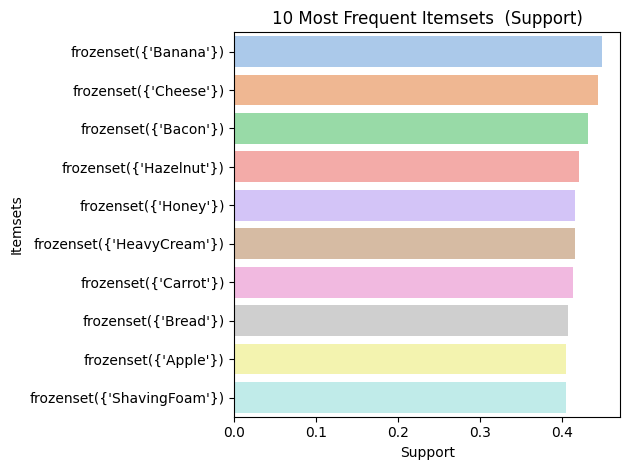

In [33]:

sns.barplot(data=top_itemsets, x='support', y=top_itemsets['itemsets'].astype(str), palette='pastel')
plt.title('10 Most Frequent Itemsets  (Support)')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.tight_layout()
plt.show()


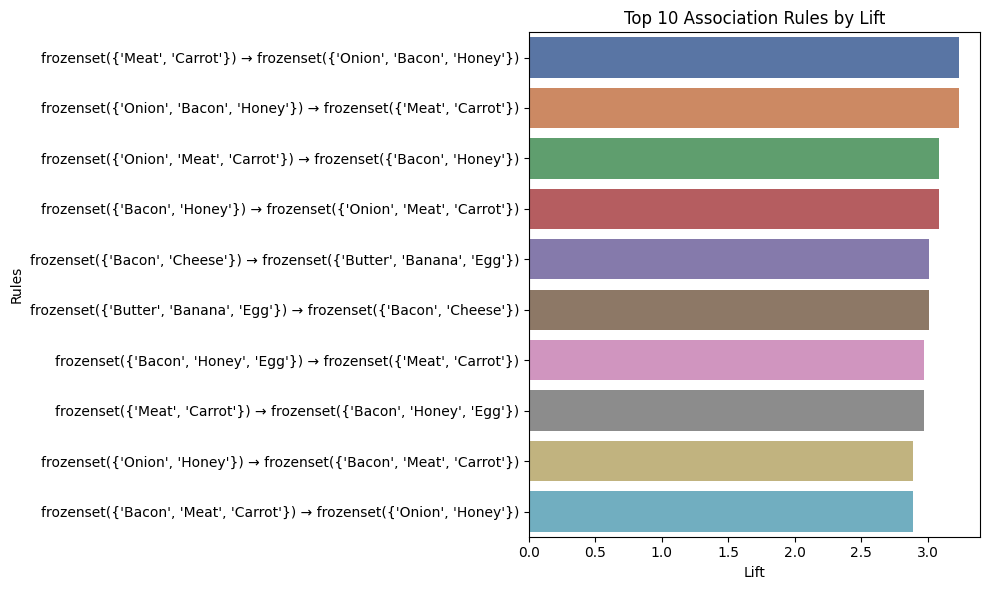

In [34]:
# Create a readable label for each rule
top_rules['rule'] = top_rules['antecedents'].astype(str) + " → " + top_rules['consequents'].astype(str)

# Plot Top 10 Association Rules by Lift
plt.figure(figsize=(10, 6))
sns.barplot(x='lift', y='rule', data=top_rules, palette='deep')
plt.title('Top 10 Association Rules by Lift')
plt.xlabel('Lift')
plt.ylabel('Rules')
plt.tight_layout()
plt.show()
